In [71]:
%run cone1.py

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 15
})

In [3]:
from matplotlib import cm

color = cm.get_cmap("RdPu")
oiii_corrs = np.loadtxt("corr")
oiii_corrs_x = np.loadtxt("corr_x_")
corr_min = np.min(oiii_corrs)

In [176]:
cors_std = np.loadtxt("../src/cors_std")

In [177]:
cors_x = np.loadtxt("../src/cors_x")[0]
cors_s = np.loadtxt("../src/cors_s")[0]

cors_x_err = np.loadtxt("../src/cors_x")[1]
cors_s_err = np.loadtxt("../src/cors_s")[1]

In [181]:
corr_min, np.min(cors_x), np.min(cors_s)

(-0.19618814710905794, -0.11526146837055426, -0.1321547374575117)

In [212]:
tmp = []

for i in range(100):
    data = gen_data0(0.5, 0.1498)


    s_b = np.sqrt(_b_std**2 - np.std(np.log10(1-angle))**2)
    s_a = np.sqrt(_a_std**2 - np.std(np.log10(angle))**2 - s_b**2)

    a, b, angle = data
    c = np.corrcoef(s_a * a + s_b * b + np.log10(angle), s_b * b + np.log10(1-angle))[0, 1]

    # plt.scatter(s_a * a + s_b * b + np.log10(angle), s_b * b + np.log10(1-angle))

    # if np.abs(c - corr_min) < 1e-4:
    #     break
    tmp.append(c)

np.mean(tmp)

-0.13096929376856895

In [146]:
np.std(s_a * a + s_b * b + np.log10(angle)), np.std(s_b * b + np.log10(1-angle))

(0.23174044466958268, 0.19672256571666924)

In [124]:
_a_std, _b_std

(0.23511969832958668, 0.1988515228185253)

In [125]:
np.std(np.log10(1-angle)), np.std(np.log10(angle))

(0.1609952099780022, 0.12391591517244606)

In [220]:
tt = np.min(cors_s)

while True:
    data = gen_data0(0.5, 0.1532)


    s_b = np.sqrt(_b_std**2 - np.std(np.log10(1-angle))**2)
    s_a = np.sqrt(_a_std**2 - np.std(np.log10(angle))**2 - s_b**2)

    a, b, angle = data
    c = np.corrcoef(s_a * a + s_b * b + np.log10(angle), s_b * b + np.log10(1-angle))[0, 1]


    if np.abs(c - corr_min) < 1e-4:
        break

In [151]:
np.std(np.log10(angle)) ** 2 / np.std(s_a * a + s_b * b + np.log10(angle)) ** 2, np.std(np.log10(1-angle)) ** 2 / np.std(s_b * b + np.log10(1-angle)) ** 2

(0.2926277843046992, 0.7293064352468551)

In [223]:
s_b ** 2 / np.std(s_a * a + s_b * b + np.log10(angle)) ** 2, s_b ** 2 / np.std(s_b * b + np.log10(1-angle)) ** 2

(0.16789197242643586, 0.25027686423889006)

In [221]:
s_a ** 2 / np.std(s_a * a + s_b * b + np.log10(angle)) ** 2

0.5497543145877394

In [222]:
1-Out[221] - Out[150][0]

0.27392430691079994

In [214]:
@np.vectorize
def frac2corrfrac(polar_frac):
    a_ = s_a * a + s_b * b + np.log10(angle)
    b_torus = s_b * b + np.log10(1 - polar_frac) + np.log10(1 - angle)
    b_polar = s_b * b + np.log10(polar_frac) + np.log10(angle)
    b_ = np.log10(10 ** b_torus + 10 ** b_polar)
    frac = 10**np.mean(b_polar - b_)
    return [np.corrcoef(a_, b_)[0, 1], frac]

In [215]:
from scipy.interpolate import CubicSpline

f = np.linspace(0,1)
res = np.array([frac2corrfrac(f) for f in f])
frac = res[:,1]
corr = res[:,0]
frac2corr0 = CubicSpline(frac, corr)

<ipython-input-214-c40a50a25993>:5: RuntimeWarning: divide by zero encountered in log10
  b_polar = s_b * b + np.log10(polar_frac) + np.log10(angle)
<ipython-input-214-c40a50a25993>:4: RuntimeWarning: divide by zero encountered in log10
  b_torus = s_b * b + np.log10(1 - polar_frac) + np.log10(1 - angle)


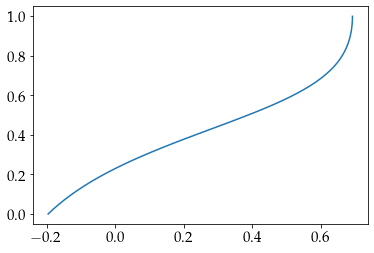

In [171]:
plt.plot(corr, frac)

In [217]:
corr2frac0 = CubicSpline(corr, frac)
frac0 = corr2frac0(cors_s)
frac0_up = corr2frac0(cors_s + cors_s_err)
frac0_low = corr2frac0(cors_s - cors_s_err)

In [162]:
frac1 = np.loadtxt("frac0")

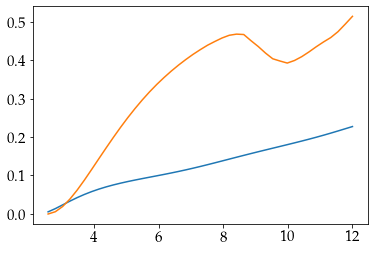

In [218]:
plt.plot(np.linspace(1, 12)[7:], frac0[7:])
plt.plot(np.linspace(1, 12)[7:], frac1[7:])

In [219]:
np.savetxt("case_b_s", [frac0, frac0_up, frac0_low])

(-4.0, 4.0)

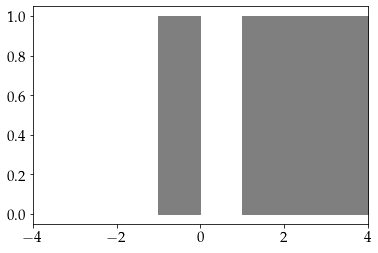

In [230]:
plt.fill_betweenx([0, 1], [1, 1], [4, 4], color="tab:gray")
plt.fill_betweenx([0, 1], [1 - 3/1.618, 0], [-1, -1], color="tab:gray")

plt.xlim((-4, 4))